In [1]:
import gc
from client import client
import torch
from server import server_multinomial_bitflip, server_multinomial_genrr, server_ell2
from data_generator import data_generator, purturbed_unif_p
import time
import numpy as np
from datetime import datetime
from random import randint
from time import sleep
    
data_gen = data_generator()
LDPclient = client()

n_test        = 100
priv_mech  = 'bitflip'
statistic  = 'elltwo'
method_name = priv_mech + statistic
privacy_level = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

server_private_vec = {
    "elltwo":server_ell2(privacy_level),
    "chi":server_multinomial_genrr(privacy_level),
    "projchi":server_multinomial_bitflip(privacy_level)
    }
server_private = server_private_vec[statistic]

In [2]:
def get_deviation_bitflip( alphabet_size, bump_size, privacy_level, sample_size, n_test):
    purturbed_unif_small = purturbed_unif_p(alphabet_size, bump_size, privacy_level)  
    priv_statistic_vec_small = np.zeros([n_test, 1])
    for i in range(n_test):
        test_num = i + 1
        torch.manual_seed(test_num)
        print(f"seed number = {test_num}")
        server_private.load_private_data_multinomial(
            LDPclient.release_private(
                priv_mech,
                data_gen.generate_multinomial_data(purturbed_unif_small.p1, sample_size),
                alphabet_size,
                privacy_level,
                device
            ),
            LDPclient.release_private(
                priv_mech,
                data_gen.generate_multinomial_data(purturbed_unif_small.p2, sample_size),
                alphabet_size,
                privacy_level,
                device
            ),
        alphabet_size,
        device,
        device
        )
                
        priv_statistic_vec_small[i] = server_private.get_original_statistic()    
    diff = purturbed_unif_small.expectation_bitflip_elltwo - priv_statistic_vec_small.mean()
    print(f"% deviation from the theoretical expectation:{diff/purturbed_unif_small.expectation_bitflip_elltwo}"
        )   
    return priv_statistic_vec_small, purturbed_unif_small.expectation_bitflip_elltwo , priv_statistic_vec_small.mean(), diff/purturbed_unif_small.expectation_bitflip_elltwo

In [4]:
def get_deviation_bitflip_noseed( alphabet_size, bump_size, privacy_level, sample_size, n_test):
    purturbed_unif_small = purturbed_unif_p(alphabet_size, bump_size, privacy_level)  
    priv_statistic_vec_small = np.zeros([n_test, 1])
    for i in range(n_test):
        test_num = i + 1
        server_private.load_private_data_multinomial(
            LDPclient.release_private(
                priv_mech,
                data_gen.generate_multinomial_data(purturbed_unif_small.p1, sample_size),
                alphabet_size,
                privacy_level,
                device
            ),
            LDPclient.release_private(
                priv_mech,
                data_gen.generate_multinomial_data(purturbed_unif_small.p2, sample_size),
                alphabet_size,
                privacy_level,
                device
            ),
        alphabet_size,
        device,
        device
        )
                
        priv_statistic_vec_small[i] = server_private.get_original_statistic()    
    diff = purturbed_unif_small.expectation_bitflip_elltwo - priv_statistic_vec_small.mean()
    print(f"% deviation from the theoretical expectation:{diff/purturbed_unif_small.expectation_bitflip_elltwo}"
        )   
    return priv_statistic_vec_small, purturbed_unif_small.expectation_bitflip_elltwo , priv_statistic_vec_small.mean(), diff/purturbed_unif_small.expectation_bitflip_elltwo

## small k

In [51]:
get_deviation_bitflip(4, 0.1, 1, 1000, 1000)




seed number = 1
tensor(0.3775)
tensor(0.3775)
tensor(0.7635) tensor(0.7896) tensor(1.5471)
tensor(0.0060)
seed number = 2
tensor(0.3775)
tensor(0.3775)
tensor(0.7851) tensor(0.7428) tensor(1.5172)
tensor(0.0106)
seed number = 3
tensor(0.3775)
tensor(0.3775)
tensor(0.7547) tensor(0.7249) tensor(1.4730)
tensor(0.0066)
seed number = 4
tensor(0.3775)
tensor(0.3775)
tensor(0.8159) tensor(0.7322) tensor(1.5371)
tensor(0.0110)
seed number = 5
tensor(0.3775)
tensor(0.3775)
tensor(0.7935) tensor(0.7806) tensor(1.5657)
tensor(0.0084)
seed number = 6
tensor(0.3775)
tensor(0.3775)
tensor(0.7644) tensor(0.8157) tensor(1.5704)
tensor(0.0097)
seed number = 7
tensor(0.3775)
tensor(0.3775)
tensor(0.7405) tensor(0.7996) tensor(1.5351)
tensor(0.0050)
seed number = 8
tensor(0.3775)
tensor(0.3775)
tensor(0.7508) tensor(0.7424) tensor(1.4865)
tensor(0.0067)
seed number = 9
tensor(0.3775)
tensor(0.3775)
tensor(0.8026) tensor(0.7444) tensor(1.5417)
tensor(0.0053)
seed number = 10
tensor(0.3775)
tensor(0.3775)

In [52]:
get_deviation_bitflip(40, 0.01, 1, 50000, 1000)

seed number = 1
tensor(0.3775)
tensor(0.3775)
tensor(5.8872) tensor(5.8800) tensor(11.7664)
tensor(0.0007)
seed number = 2
tensor(0.3775)
tensor(0.3775)
tensor(5.8886) tensor(5.9079) tensor(11.7959)
tensor(0.0006)
seed number = 3
tensor(0.3775)
tensor(0.3775)
tensor(5.8761) tensor(5.8880) tensor(11.7635)
tensor(0.0006)
seed number = 4
tensor(0.3775)
tensor(0.3775)
tensor(5.8904) tensor(5.8743) tensor(11.7640)
tensor(0.0006)
seed number = 5
tensor(0.3775)
tensor(0.3775)
tensor(5.8713) tensor(5.8988) tensor(11.7692)
tensor(0.0009)
seed number = 6
tensor(0.3775)
tensor(0.3775)
tensor(5.8724) tensor(5.8994) tensor(11.7707)
tensor(0.0011)
seed number = 7
tensor(0.3775)
tensor(0.3775)
tensor(5.8905) tensor(5.8872) tensor(11.7767)
tensor(0.0010)
seed number = 8
tensor(0.3775)
tensor(0.3775)
tensor(5.8624) tensor(5.8821) tensor(11.7436)
tensor(0.0008)
seed number = 9
tensor(0.3775)
tensor(0.3775)
tensor(5.8777) tensor(5.8992) tensor(11.7754)
tensor(0.0014)
seed number = 10
tensor(0.3775)
tenso

In [6]:
vec_200, theo_200, emp_200, diff_200 = get_deviation_bitflip(400, 0.002, 1, 200000, 200)

seed number = 1
tensor(0.3775)
tensor(0.3775)
tensor(57.2194, dtype=torch.float64) tensor(57.2007, dtype=torch.float64) tensor(114.4197, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
seed number = 2
tensor(0.3775)
tensor(0.3775)
tensor(57.2018, dtype=torch.float64) tensor(57.2154, dtype=torch.float64) tensor(114.4166, dtype=torch.float64)
tensor(0.0006, dtype=torch.float64)
seed number = 3
tensor(0.3775)
tensor(0.3775)
tensor(57.2187, dtype=torch.float64) tensor(57.1890, dtype=torch.float64) tensor(114.4073, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
seed number = 4
tensor(0.3775)
tensor(0.3775)
tensor(57.1992, dtype=torch.float64) tensor(57.2051, dtype=torch.float64) tensor(114.4038, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
seed number = 5
tensor(0.3775)
tensor(0.3775)
tensor(57.1814, dtype=torch.float64) tensor(57.1979, dtype=torch.float64) tensor(114.3791, dtype=torch.float64)
tensor(0.0002, dtype=torch.float64)
seed number = 6
tensor(0.3775)

In [7]:
vec_190, theo_190, emp_190, diff_190 = get_deviation_bitflip(400, 0.002, 1, 190000, 200)

seed number = 1
tensor(0.3775)
tensor(0.3775)
tensor(57.2273, dtype=torch.float64) tensor(57.1959, dtype=torch.float64) tensor(114.4228, dtype=torch.float64)
tensor(0.0003, dtype=torch.float64)
seed number = 2
tensor(0.3775)
tensor(0.3775)
tensor(57.2043, dtype=torch.float64) tensor(57.2072, dtype=torch.float64) tensor(114.4109, dtype=torch.float64)
tensor(0.0006, dtype=torch.float64)
seed number = 3
tensor(0.3775)
tensor(0.3775)
tensor(57.2156, dtype=torch.float64) tensor(57.1941, dtype=torch.float64) tensor(114.4093, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
seed number = 4
tensor(0.3775)
tensor(0.3775)
tensor(57.1982, dtype=torch.float64) tensor(57.2088, dtype=torch.float64) tensor(114.4064, dtype=torch.float64)
tensor(0.0006, dtype=torch.float64)
seed number = 5
tensor(0.3775)
tensor(0.3775)
tensor(57.1844, dtype=torch.float64) tensor(57.1921, dtype=torch.float64) tensor(114.3762, dtype=torch.float64)
tensor(0.0002, dtype=torch.float64)
seed number = 6
tensor(0.3775)

In [55]:
vec_160, theo_160, emp_160, diff_160 = get_deviation_bitflip(400, 0.002, 1, 160000, 200)

seed number = 1
tensor(0.3775)
tensor(0.3775)
tensor(57.2213) tensor(57.2214) tensor(114.4425)
tensor(0.0002)
seed number = 2
tensor(0.3775)
tensor(0.3775)
tensor(57.2028) tensor(57.2038) tensor(114.4060)
tensor(0.0006)
seed number = 3
tensor(0.3775)
tensor(0.3775)
tensor(57.2073) tensor(57.2119) tensor(114.4187)
tensor(0.0005)
seed number = 4
tensor(0.3775)
tensor(0.3775)
tensor(57.2118) tensor(57.1907) tensor(114.4019)
tensor(0.0006)
seed number = 5
tensor(0.3775)
tensor(0.3775)
tensor(57.1819) tensor(57.1755) tensor(114.3572)
tensor(0.0003)
seed number = 6
tensor(0.3775)
tensor(0.3775)
tensor(57.2051) tensor(57.2388) tensor(114.4436)
tensor(0.0004)
seed number = 7
tensor(0.3775)
tensor(0.3775)
tensor(57.1819) tensor(57.2073) tensor(114.3888)
tensor(0.0004)
seed number = 8
tensor(0.3775)
tensor(0.3775)
tensor(57.1903) tensor(57.1880) tensor(114.3779)
tensor(0.0004)
seed number = 9
tensor(0.3775)
tensor(0.3775)
tensor(57.1886) tensor(57.2015) tensor(114.3897)
tensor(0.0005)
seed numbe

## no seed

In [5]:
vec_200_noseed, theo_200_noseed, emp_200_noseed, diff_200_noseed = get_deviation_bitflip_noseed(400, 0.002, 1, 200000, 200)

tensor(0.3775)
tensor(0.3775)
tensor(57.1708, dtype=torch.float64) tensor(57.1875, dtype=torch.float64) tensor(114.3578, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.3775)
tensor(0.3775)
tensor(57.1926, dtype=torch.float64) tensor(57.2010, dtype=torch.float64) tensor(114.3933, dtype=torch.float64)
tensor(0.0003, dtype=torch.float64)
tensor(0.3775)
tensor(0.3775)
tensor(57.1812, dtype=torch.float64) tensor(57.2150, dtype=torch.float64) tensor(114.3960, dtype=torch.float64)
tensor(0.0002, dtype=torch.float64)
tensor(0.3775)
tensor(0.3775)
tensor(57.1907, dtype=torch.float64) tensor(57.2127, dtype=torch.float64) tensor(114.4029, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.3775)
tensor(0.3775)
tensor(57.2058, dtype=torch.float64) tensor(57.2099, dtype=torch.float64) tensor(114.4153, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)
tensor(0.3775)
tensor(0.3775)
tensor(57.2118, dtype=torch.float64) tensor(57.2073, dtype=torch.float64) tensor

tensor(0.0004)


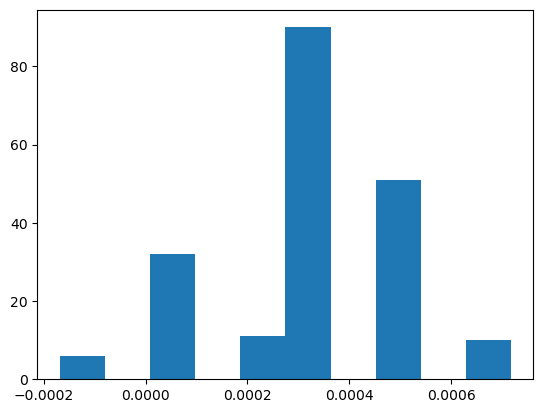

In [68]:
import matplotlib.pyplot as plt
plt.hist(vec_200_noseed)
print(theo_200_noseed)

In [61]:
vec_170_noseed, theo_170_noseed, emp_170_noseed, diff_170_noseed = get_deviation_bitflip_noseed(400, 0.002, 1, 170000, 200)

tensor(0.3775)
tensor(0.3775)
tensor(57.2261) tensor(57.2001) tensor(114.4256)
tensor(0.0006)
tensor(0.3775)
tensor(0.3775)
tensor(57.1855) tensor(57.2219) tensor(114.4072)
tensor(0.0002)
tensor(0.3775)
tensor(0.3775)
tensor(57.2060) tensor(57.1914) tensor(114.3972)
tensor(0.0002)
tensor(0.3775)
tensor(0.3775)
tensor(57.1907) tensor(57.1962) tensor(114.3867)
tensor(0.0002)
tensor(0.3775)
tensor(0.3775)
tensor(57.2547) tensor(57.2086) tensor(114.4627)
tensor(0.0006)
tensor(0.3775)
tensor(0.3775)
tensor(57.1868) tensor(57.1907) tensor(114.3771)
tensor(0.0004)
tensor(0.3775)
tensor(0.3775)
tensor(57.1931) tensor(57.2025) tensor(114.3954)
tensor(0.0002)
tensor(0.3775)
tensor(0.3775)
tensor(57.2186) tensor(57.1748) tensor(114.3933)
tensor(0.0002)
tensor(0.3775)
tensor(0.3775)
tensor(57.1922) tensor(57.2149) tensor(114.4068)
tensor(0.0004)
tensor(0.3775)
tensor(0.3775)
tensor(57.2221) tensor(57.2221) tensor(114.4439)
tensor(0.0004)
tensor(0.3775)
tensor(0.3775)
tensor(57.1870) tensor(57.2145

KeyboardInterrupt: 

## elltwo statistic verification

In [5]:
nonpriv_statistic_vec = np.zeros([n_test, 1])
for i in range(n_test):
    test_num = i + 1
    t_start_i = time.time()
    torch.manual_seed(test_num)
    print(f"seed number = {test_num}")
    server_private.load_private_data_multinomial(   
            data_gen.generate_multinomial_data(p1, sample_size),
            data_gen.generate_multinomial_data(p2, sample_size),
    alphabet_size,
    device,
    device
    )
            
    nonpriv_statistic_vec[i] = server_private.get_original_statistic() 
nonpriv_statistic_vec.mean()

seed number = 1
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 2
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 3
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0063)
seed number = 4
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0063)
seed number = 5
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0063)
seed number = 6
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 7
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 8
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0063)
seed number = 9
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 10
tensor(0.0040) tensor(0.0041) tensor(0.0019)
tensor(0.0063)
seed number = 11
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0063)
seed number = 12
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed number = 13
tensor(0.0041) tensor(0.0041) tensor(0.0018)
tensor(0.0064)
seed num

0.0063968036370351915

In [12]:
priv_statistic_vec

array([[ 1.67846680e-04],
       [ 5.34057617e-05],
       [ 4.88281250e-04],
       [ 2.82287598e-04],
       [ 3.81469727e-04],
       [ 5.34057617e-05],
       [ 1.60217285e-04],
       [ 3.81469727e-04],
       [ 3.81469727e-04],
       [-4.57763672e-05],
       [ 4.88281250e-04],
       [ 1.60217285e-04],
       [ 3.81469727e-04],
       [ 4.95910645e-04],
       [ 2.74658203e-04],
       [ 6.17980957e-04],
       [ 5.34057617e-05],
       [ 3.81469727e-04],
       [ 5.34057617e-05],
       [ 1.90734863e-04],
       [ 4.95910645e-04],
       [ 1.67846680e-04],
       [ 7.17163086e-04],
       [ 6.10351562e-04],
       [ 1.75476074e-04],
       [ 2.89916992e-04],
       [ 2.74658203e-04],
       [ 6.10351562e-05],
       [ 7.09533691e-04],
       [ 2.82287598e-04],
       [ 2.67028809e-04],
       [ 3.81469727e-04],
       [ 2.74658203e-04],
       [ 3.81469727e-04],
       [ 1.60217285e-04],
       [ 4.88281250e-04],
       [ 4.88281250e-04],
       [ 5.03540039e-04],
       [ 2.7